# StyleSynth

StyleSynth is an AI system that uses a custom diffusion model to generate images of new articles of clothing.

This demo was run in Google Colab, on a Python 3 runtime with one A100 GPU.

In [1]:
import matplotlib.pyplot as plt
from stylesynth import StyleSynth

In [2]:
# path for saving and loading diffusion model
MODEL_PATH = './stylesynth_diffusion_model.pt'

# clothing types to generate and display images for
CLOTHING_TYPES = [
    'Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
    'Sneaker', 'Bag', 'Boot']

# for displaying images
def display_images(imgs):
    num_rows = 2
    num_cols = len(CLOTHING_TYPES) // 2
    _, axes = plt.subplots(
        nrows=num_rows, ncols=num_cols,
        figsize=(num_cols * 2, num_rows * 2))
    for i in range(len(imgs)):
        row = i // num_cols
        col = i % num_cols
        axes[row, col].imshow(imgs[i])
        axes[row, col].axis('off')
        axes[row, col].set_title(f'{CLOTHING_TYPES[i]}')

INFO:StyleSynth_Logger:Loading Fashion MNIST dataset...
INFO:StyleSynth_Logger:Dataset loaded
INFO:StyleSynth_Logger:Instantiating U-Net...
INFO:StyleSynth_Logger:Instantiated U-Net
INFO:StyleSynth_Logger:U-Net has 538.769751M parameters
INFO:StyleSynth_Logger:Training U-Net for noise prediction...
  0%|          | 0/50 [00:00<?, ?it/s]INFO:StyleSynth_Logger:Epoch 1 / 50
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.09727631509304047


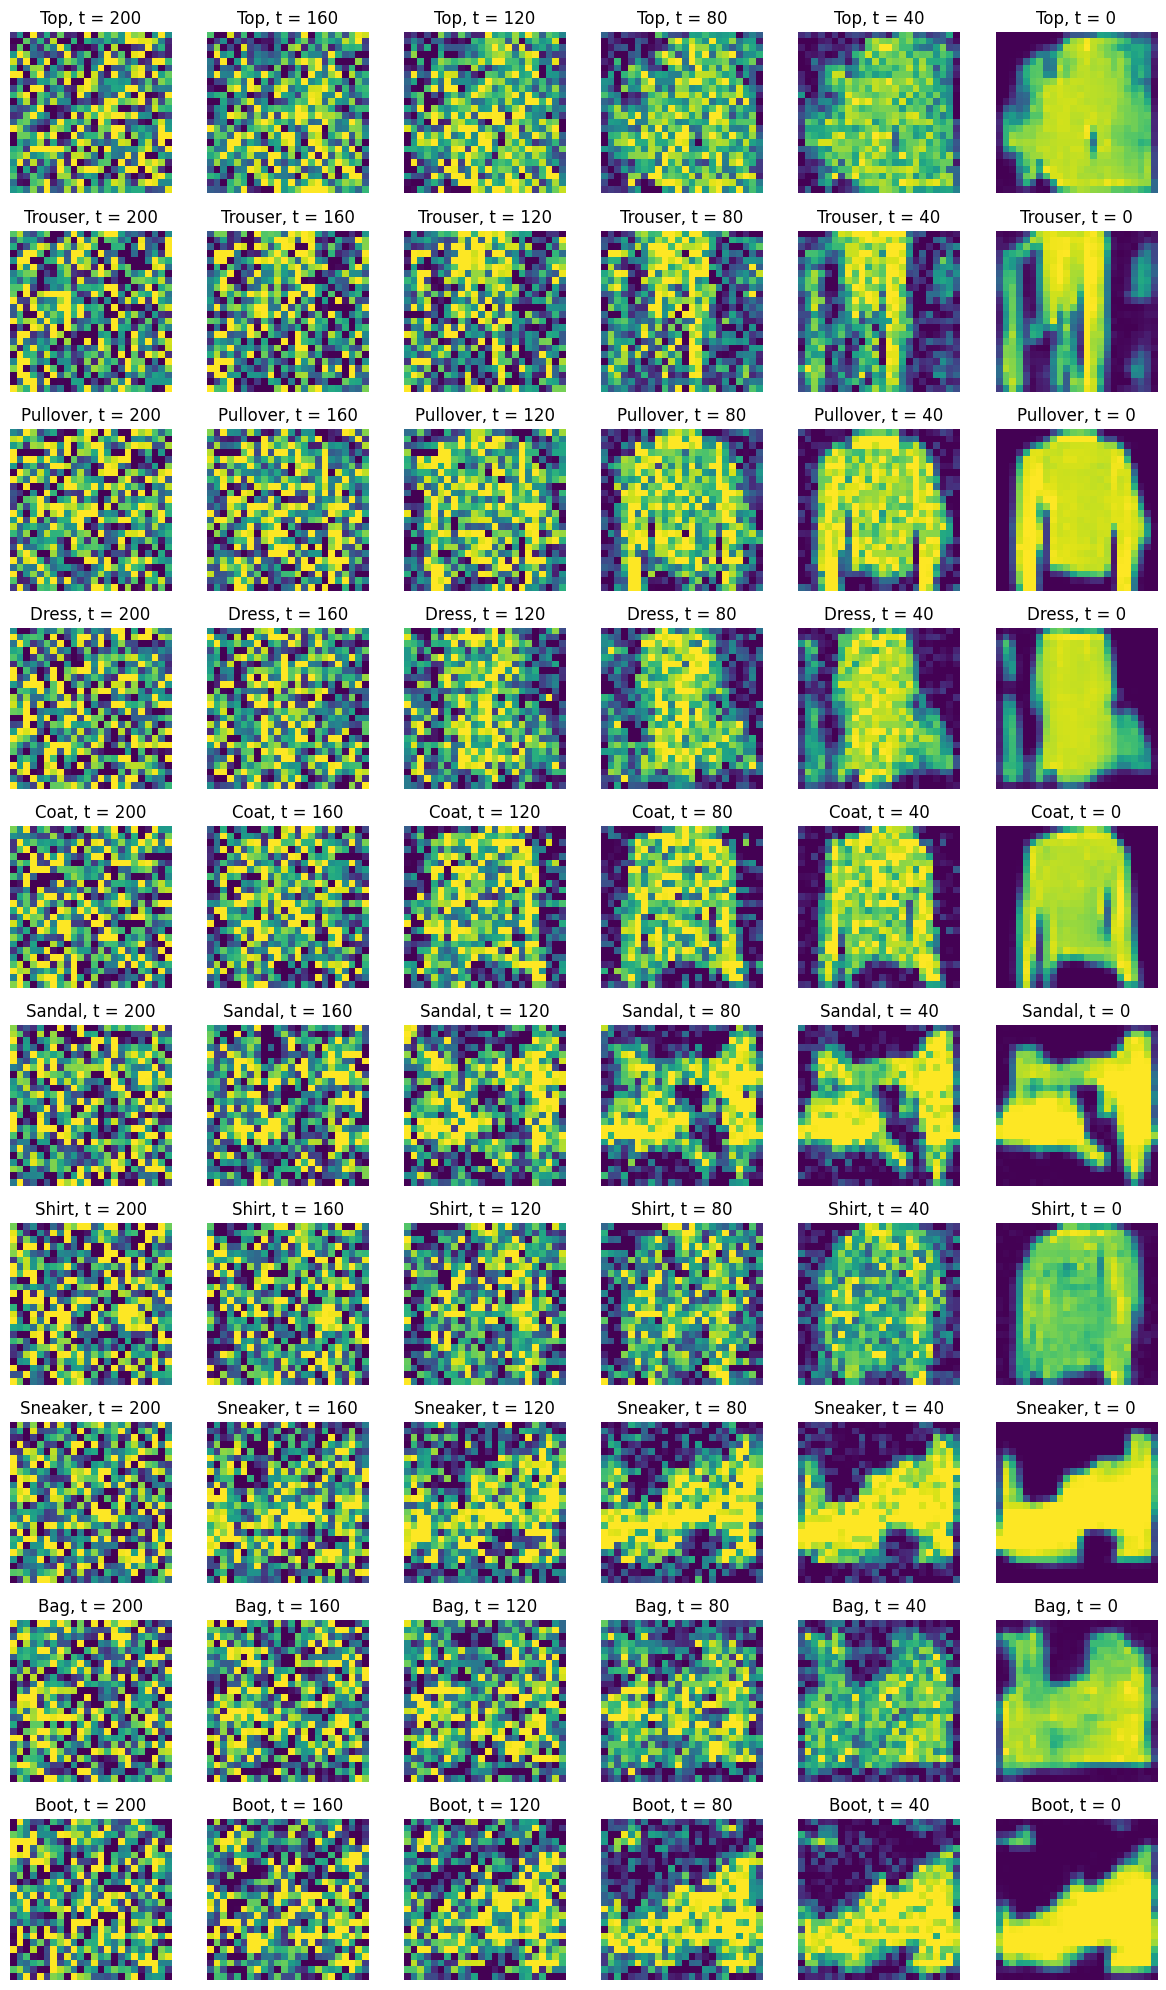

 18%|█▊        | 9/50 [11:50<53:30, 78.29s/it]INFO:StyleSynth_Logger:Epoch 10 / 50
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.06800836324691772


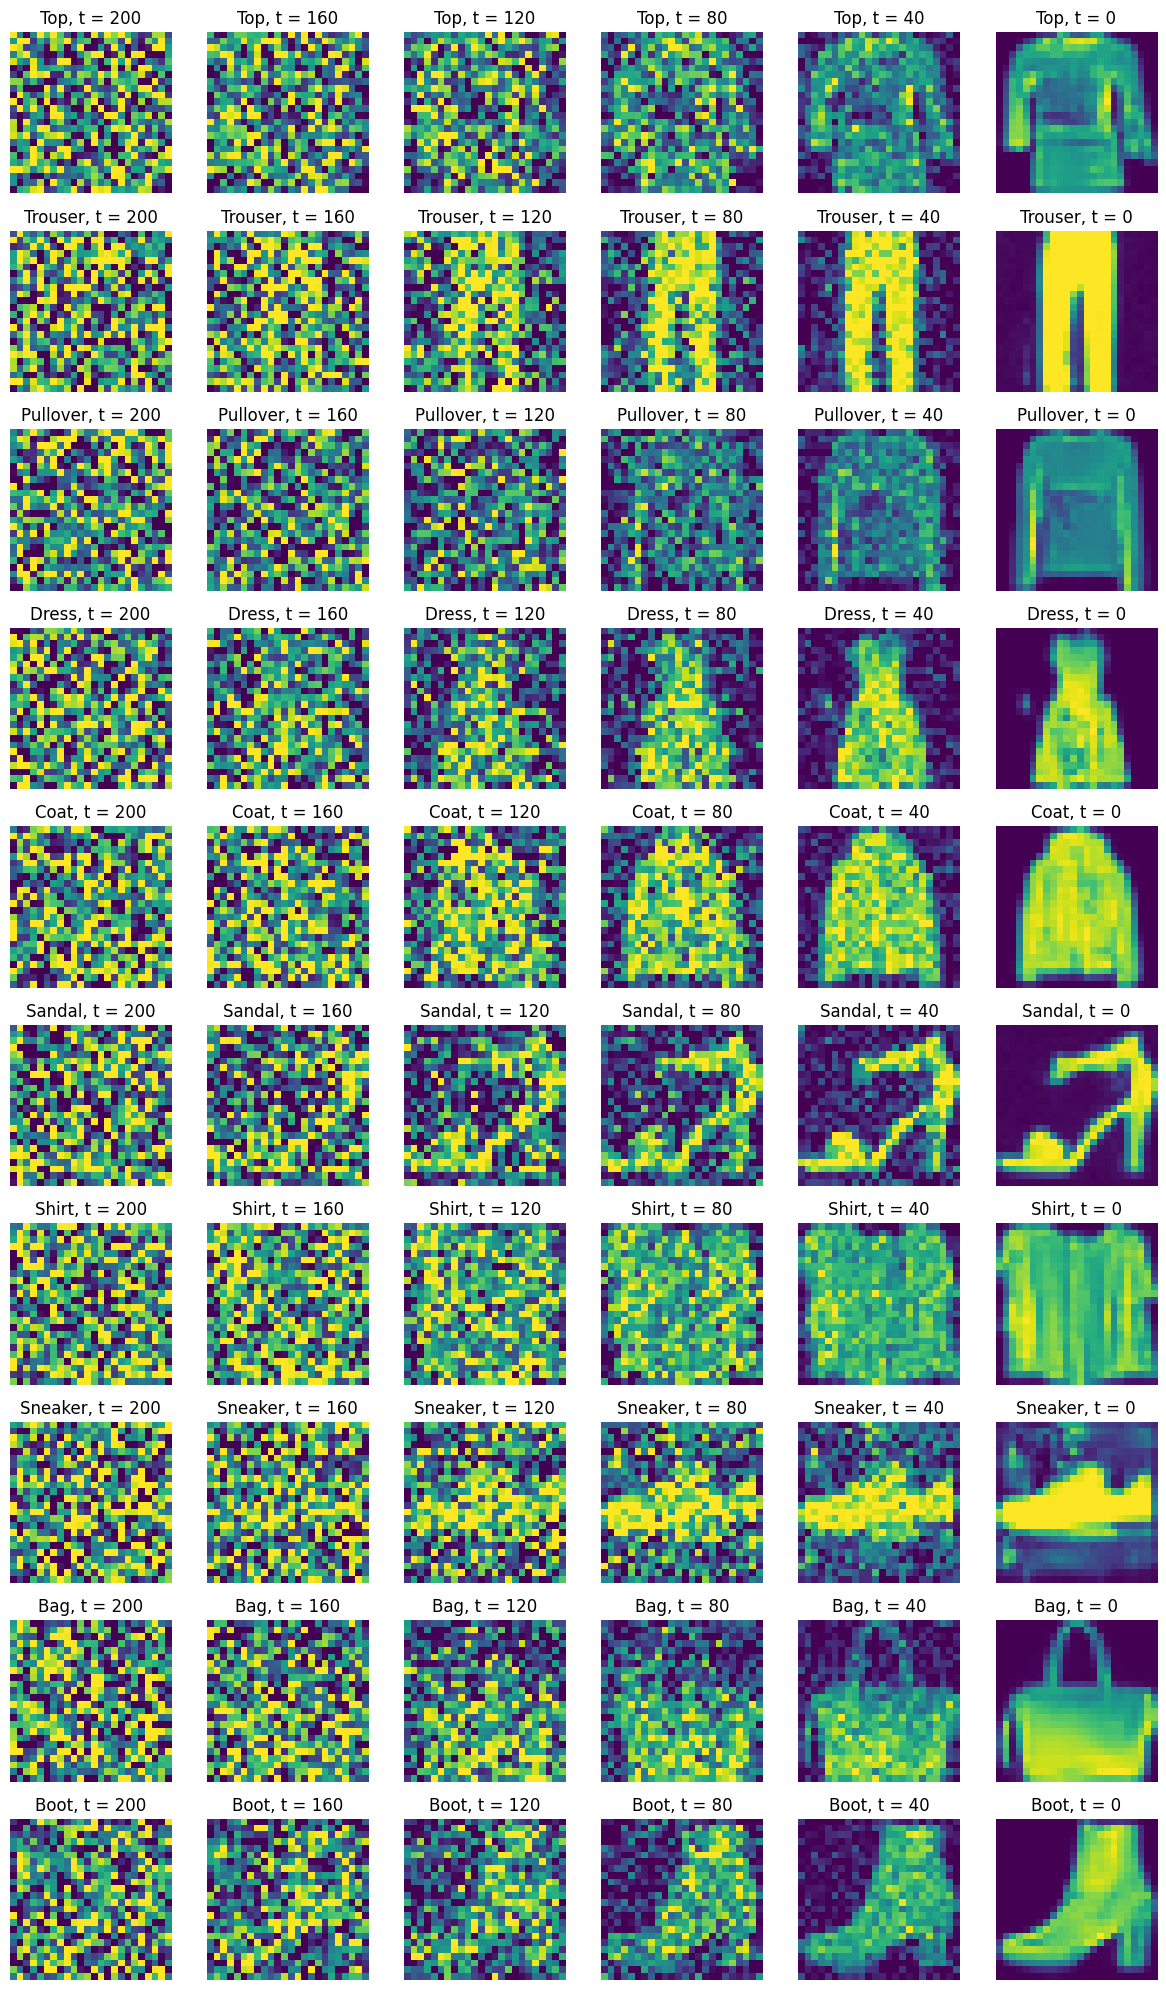

 38%|███▊      | 19/50 [24:59<40:28, 78.34s/it]INFO:StyleSynth_Logger:Epoch 20 / 50
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.06951536983251572


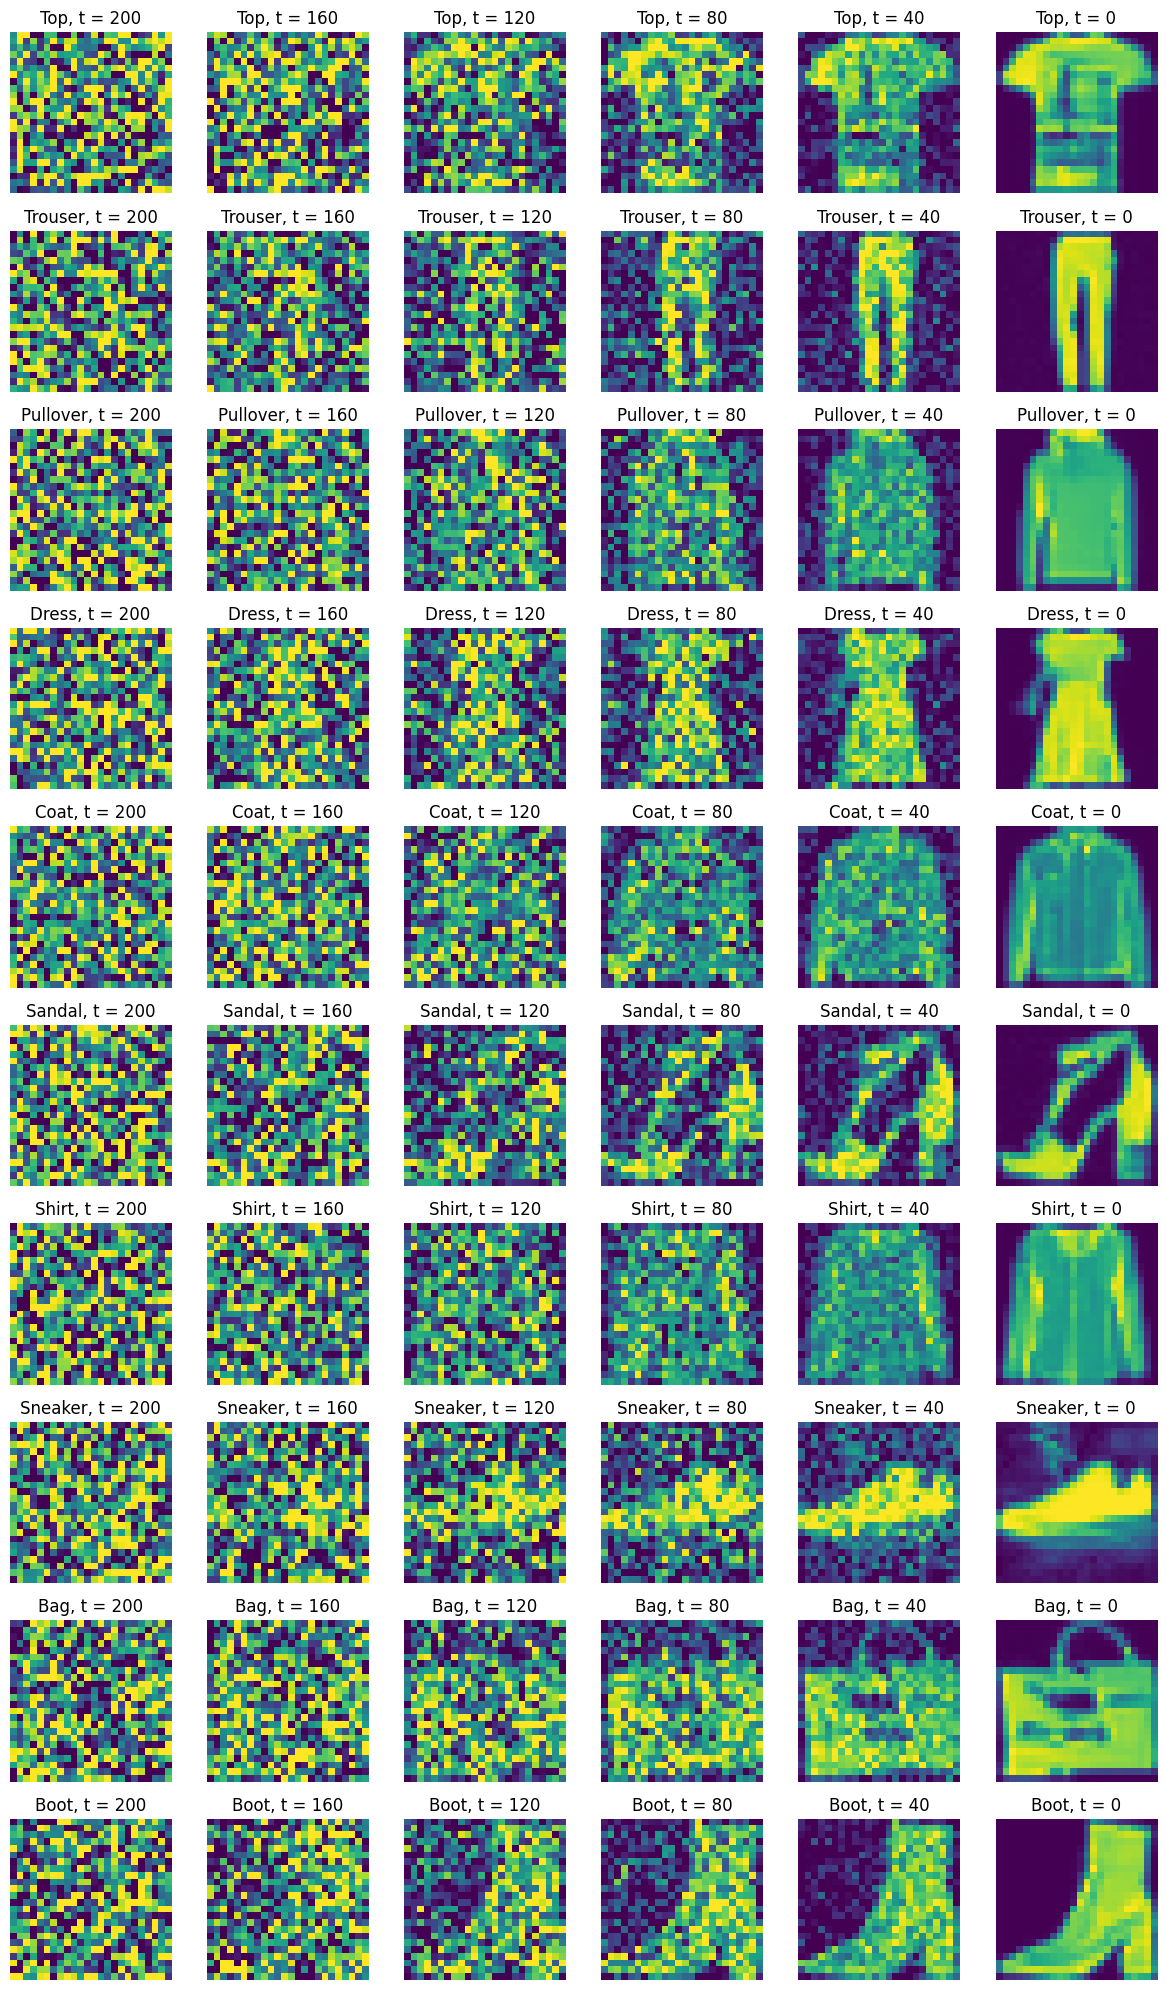

 58%|█████▊    | 29/50 [38:09<27:25, 78.36s/it]INFO:StyleSynth_Logger:Epoch 30 / 50
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.05056243762373924


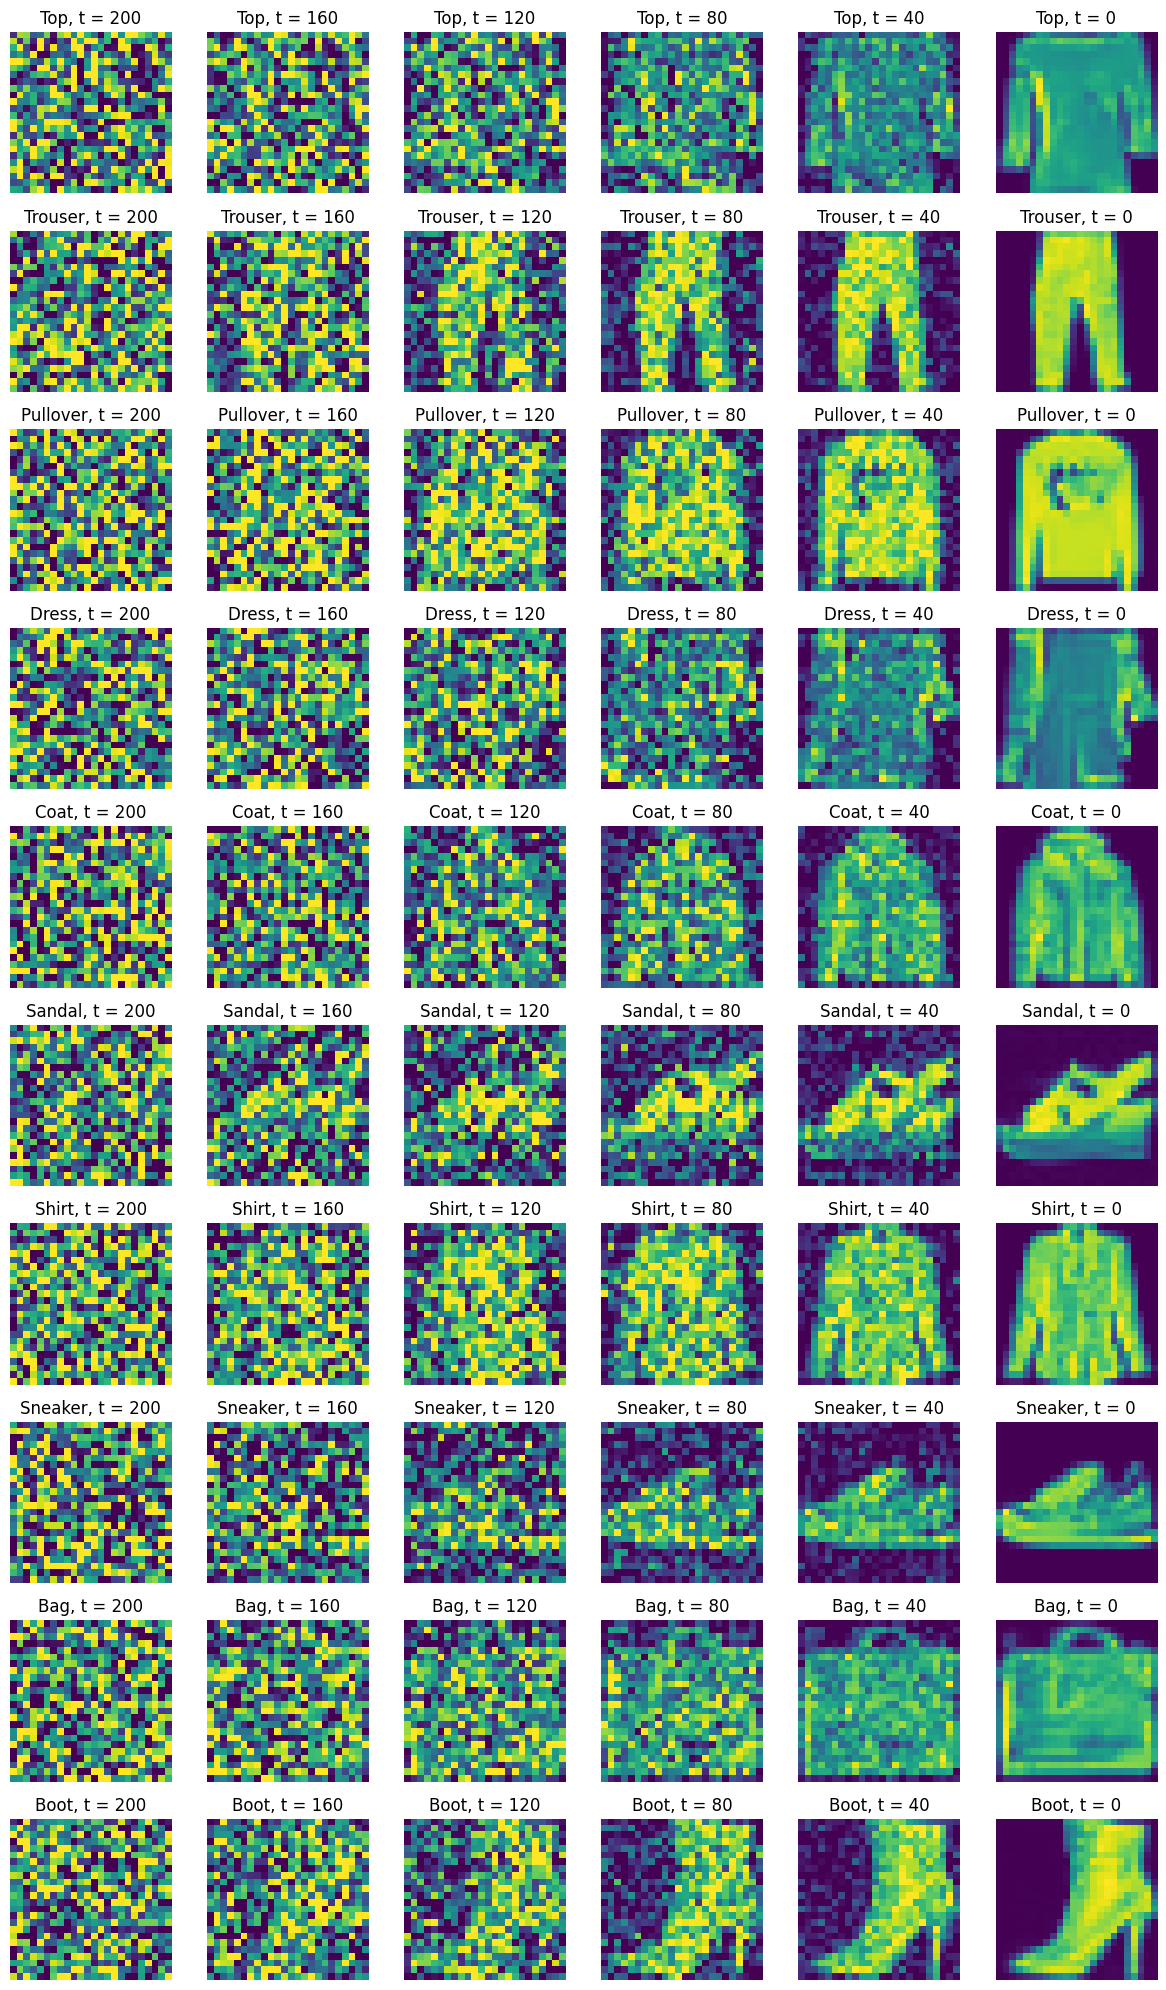

 78%|███████▊  | 39/50 [51:18<14:22, 78.37s/it]INFO:StyleSynth_Logger:Epoch 40 / 50
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.07195202261209488


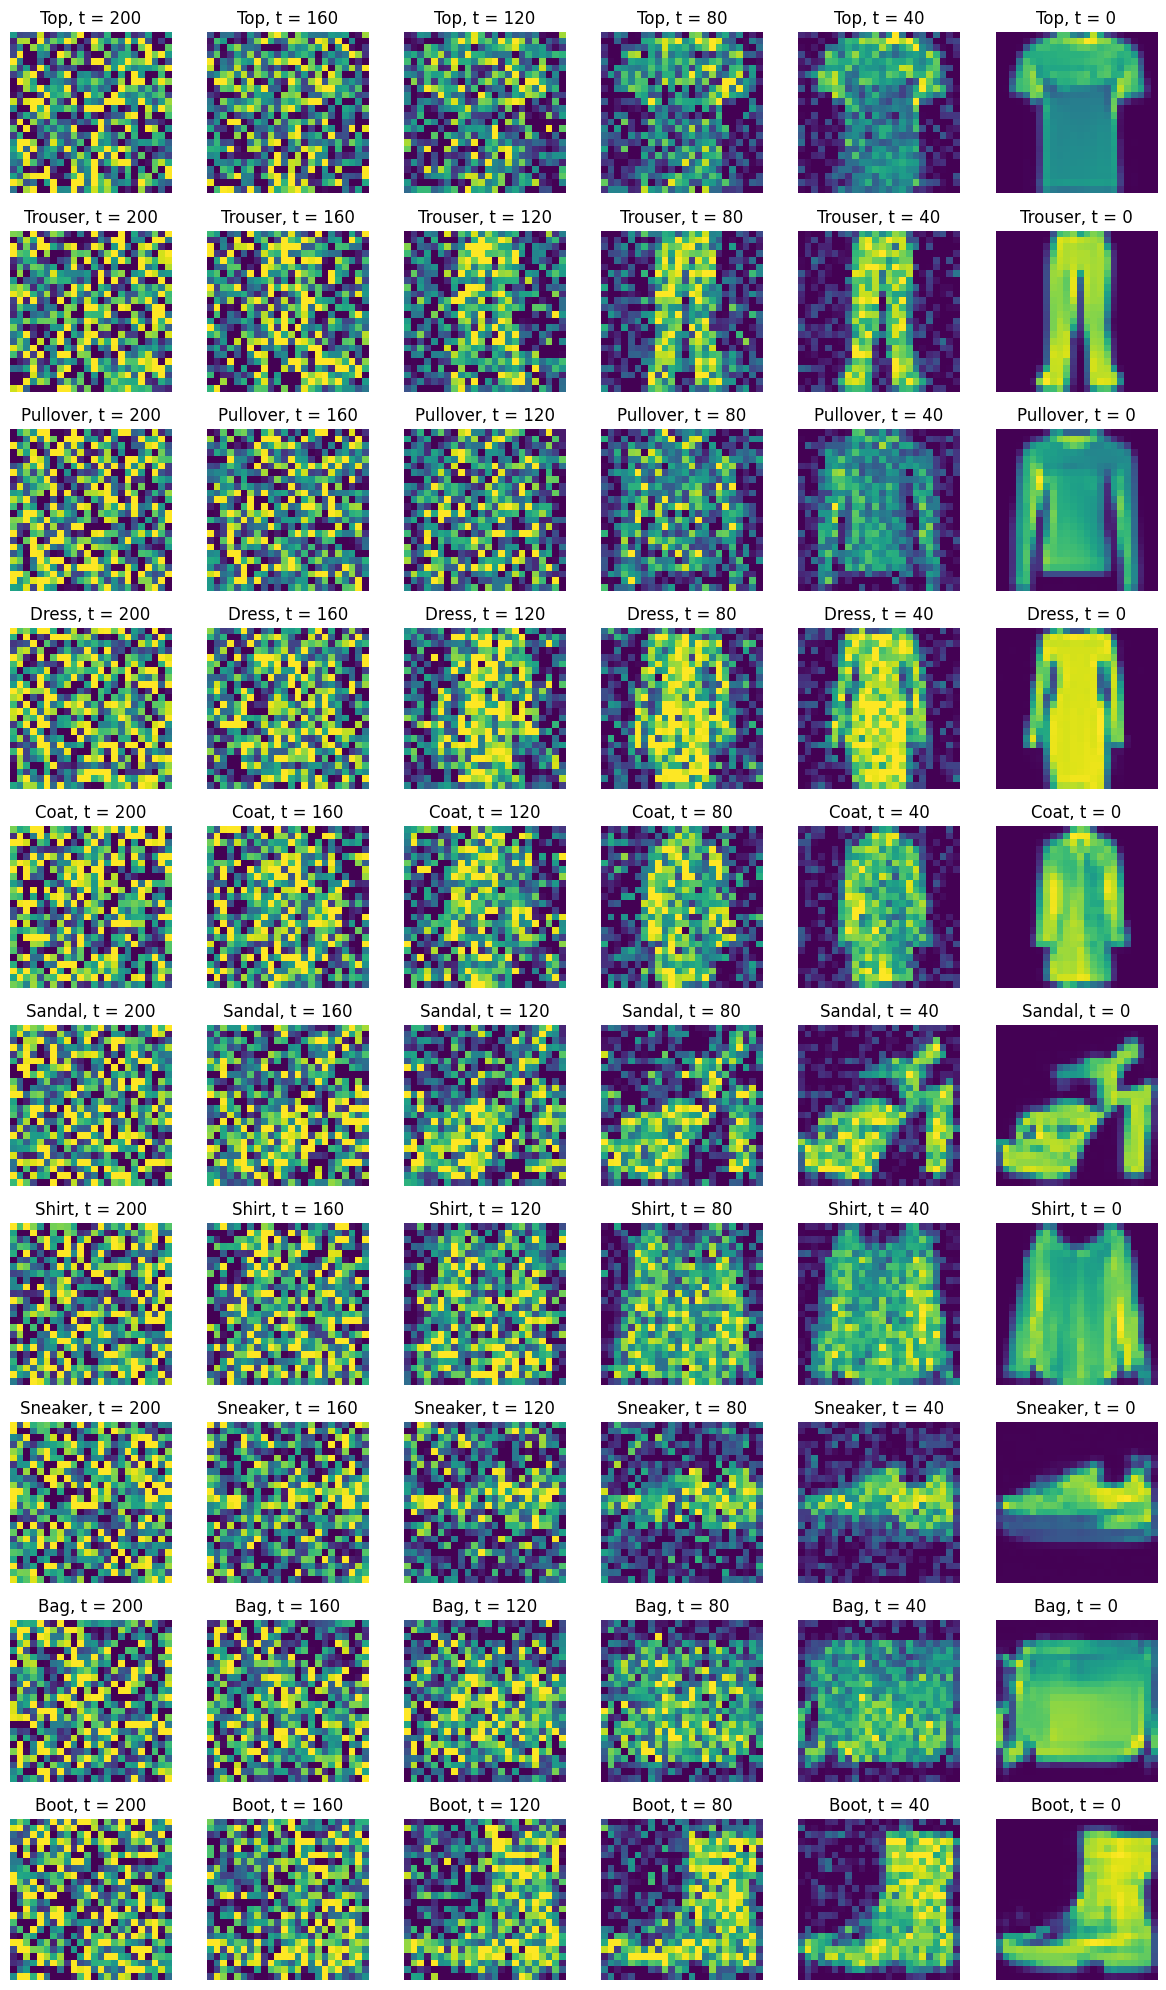

 98%|█████████▊| 49/50 [1:04:28<01:18, 78.34s/it]INFO:StyleSynth_Logger:Epoch 50 / 50
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.06336484849452972


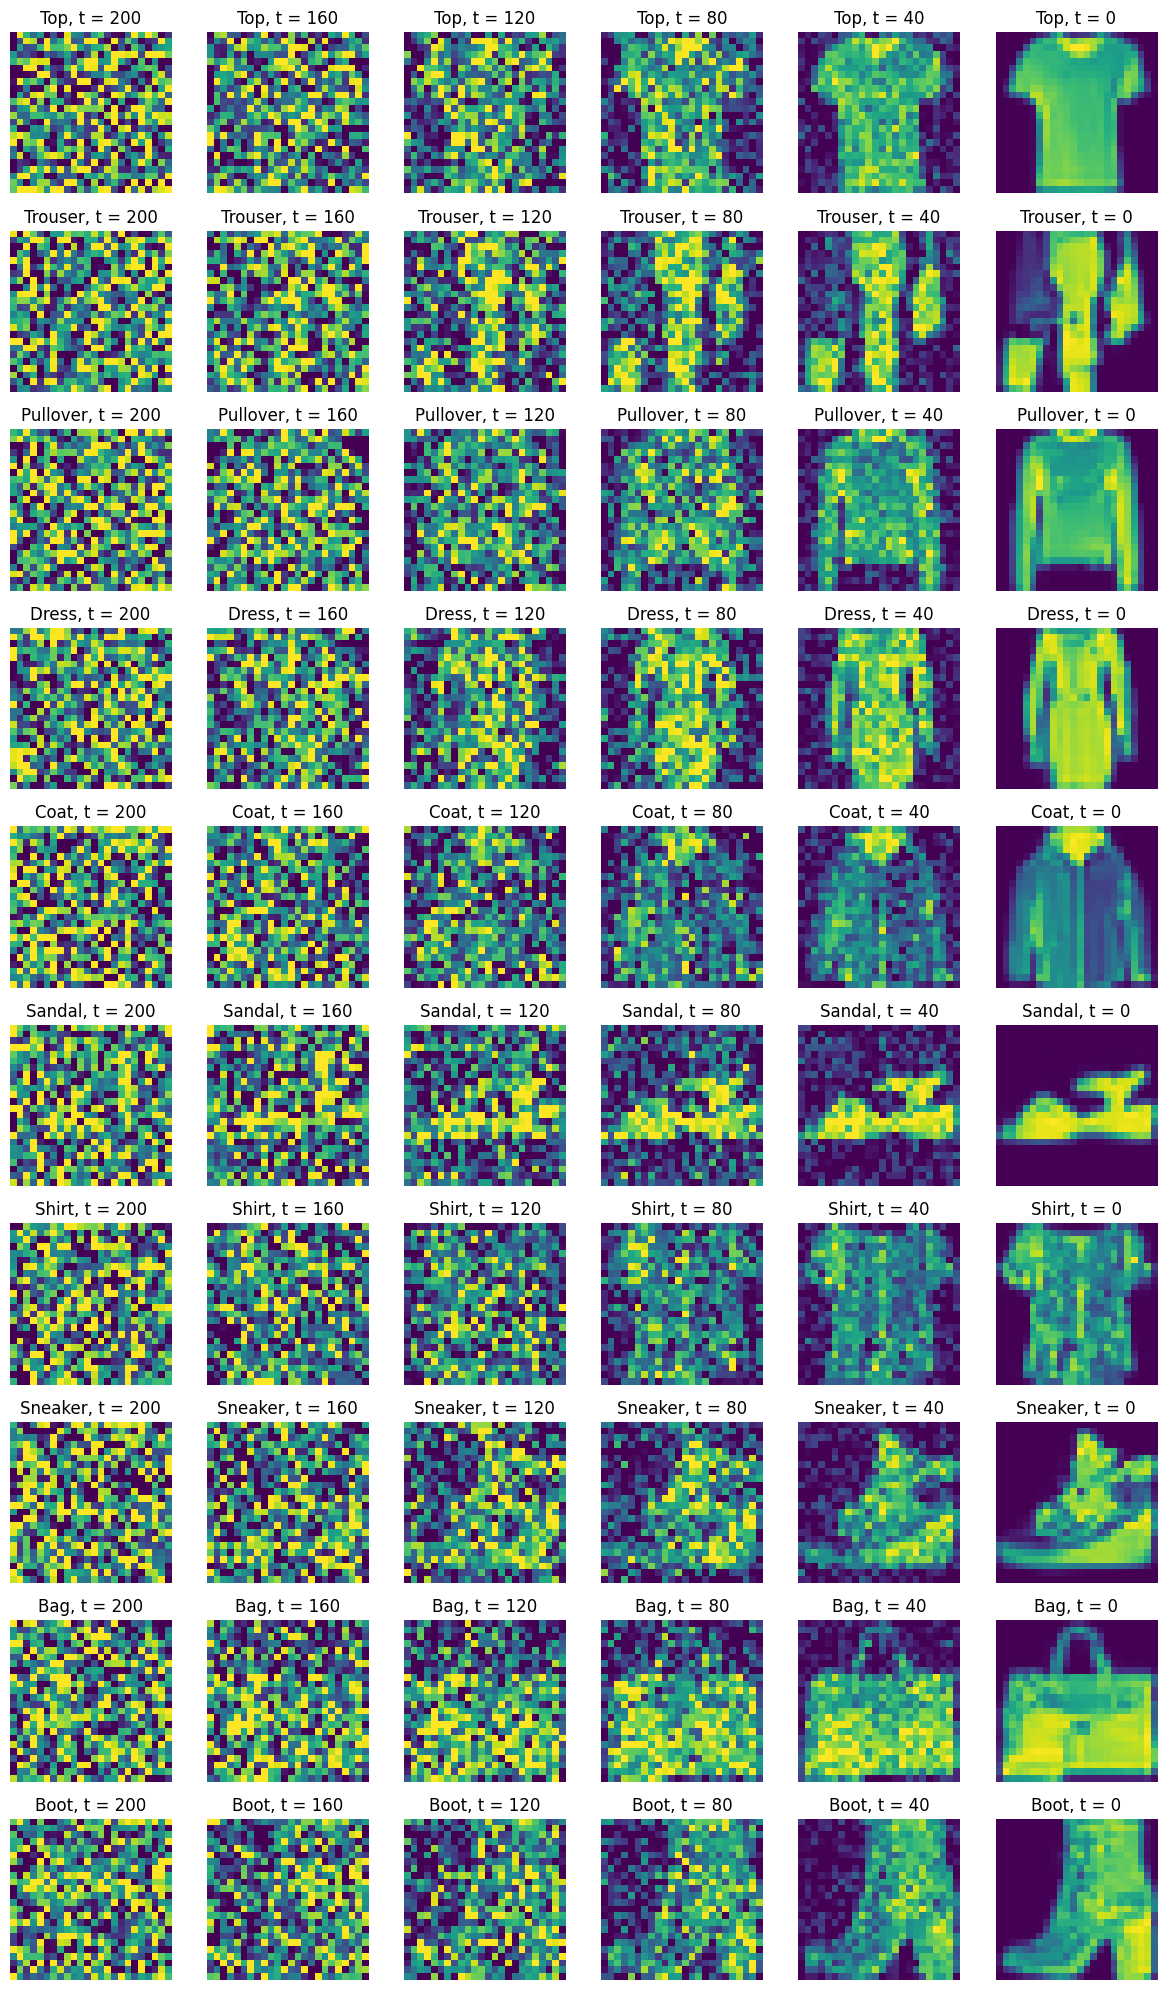

100%|██████████| 50/50 [1:05:53<00:00, 79.07s/it]
INFO:StyleSynth_Logger:Training complete


In [3]:
# train StyleSynth diffusion model
ss = StyleSynth()
ss.train(img_size=24, epochs=35, batch_size=32, vis_interval=10)

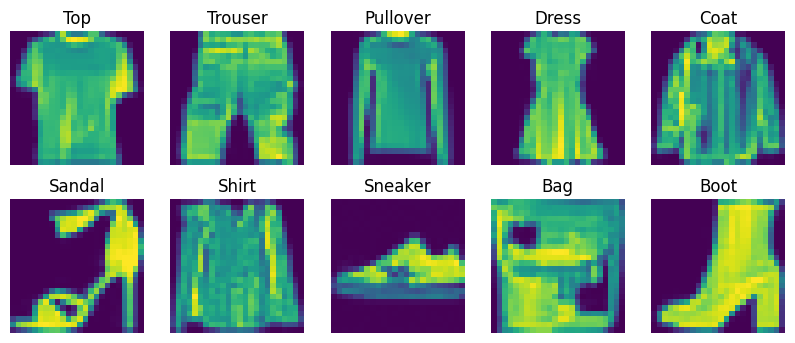

In [12]:
# generate and display images after training
imgs = ss.generate(CLOTHING_TYPES)
display_images(imgs)

In [13]:
# save StyleSynth diffusion model
ss.save(save_path=MODEL_PATH)

INFO:StyleSynth_Logger:Saved StyleSynth diffusion model to ./stylesynth_diffusion_model.pt


In [14]:
# load StyleSynth diffusion model
ss = StyleSynth()
ss.load(load_path=MODEL_PATH)

INFO:StyleSynth_Logger:Instantiating U-Net...
INFO:StyleSynth_Logger:Instantiated U-Net
INFO:StyleSynth_Logger:U-Net has 538.769751M parameters
INFO:StyleSynth_Logger:Loaded StyleSynth diffusion model


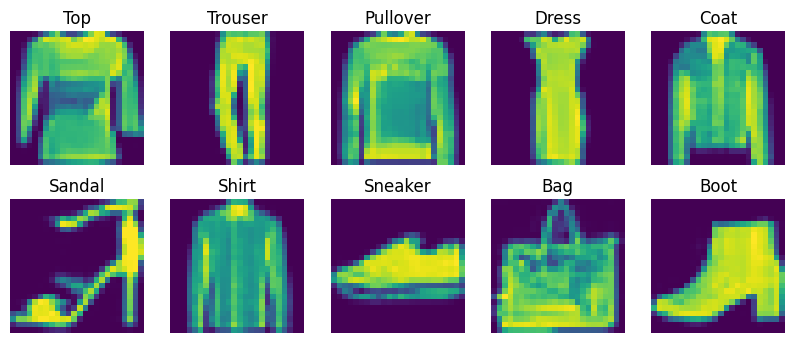

In [18]:
# generate and display images after loading
imgs = ss.generate(CLOTHING_TYPES)
display_images(imgs)